In [1]:
import tensorflow

In [2]:
from tensorflow import keras

In [3]:
dataset = keras.datasets.fashion_mnist

In [4]:
((x_train, y_train), (x_test, y_test)) = dataset.load_data()

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
print(len(x_train))
print(len(x_test))

60000
10000


In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
y_labels = [
    'camiseta', 'calca', 'pullover', 'vestido', 'casaco',
    'sandalia', 'camisa', 'tenis', 'bolsa', 'bota'
]

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

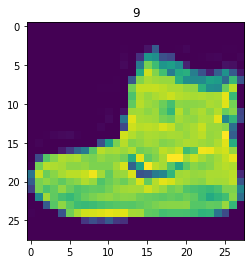

In [10]:
plt.imshow(x_train[0])
plt.title(y_train[0])

Text(0.5, 1.0, '0')

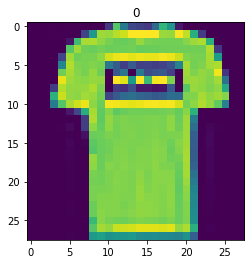

In [11]:
plt.imshow(x_train[1])
plt.title(y_train[1])

In [12]:
print(y_train.min(), y_train.max())

0 9


In [13]:
num_classes = 10

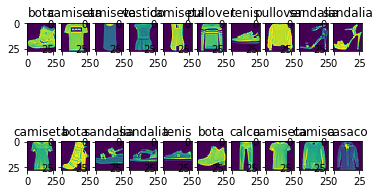

In [14]:
for item in range(0,20):
    plt.subplot(2, 10, item+1)
    plt.imshow(x_train[item])
    plt.title(y_labels[y_train[item]])

# Starting the classification with Deep Learning

In [15]:
from keras.layers import Flatten, Dense

Using TensorFlow backend.


In [94]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    #processamento,
    #saida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc', 'mae'])

In [95]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 24us/sample - loss: 0.9485 - acc: 0.6727 - mae: 4.4224 - val_loss: 0.5240 - val_acc: 0.8193 - val_mae: 4.3983
Epoch 2/20
54000/54000 [==============================] - 1s 12us/sample - loss: 0.5165 - acc: 0.8196 - mae: 4.4224 - val_loss: 0.4245 - val_acc: 0.8462 - val_mae: 4.3983
Epoch 3/20
54000/54000 [==============================] - 1s 13us/sample - loss: 0.4415 - acc: 0.8443 - mae: 4.4224 - val_loss: 0.3920 - val_acc: 0.8565 - val_mae: 4.3983
Epoch 4/20
54000/54000 [==============================] - 1s 13us/sample - loss: 0.3977 - acc: 0.8580 - mae: 4.4224 - val_loss: 0.3750 - val_acc: 0.8635 - val_mae: 4.3983
Epoch 5/20
54000/54000 [==============================] - 1s 13us/sample - loss: 0.3772 - acc: 0.8648 - mae: 4.4224 - val_loss: 0.3548 - val_acc: 0.8715 - val_mae: 4.3983
Epoch 6/20
54000/54000 [==============================] - 1s 14us/sample - loss: 0.3489 - acc: 0

In [96]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [97]:
y_pred = model.predict(x_test)

In [98]:
model_evaluration = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3287 - acc: 0.8874 - mae: 4.4200


In [99]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

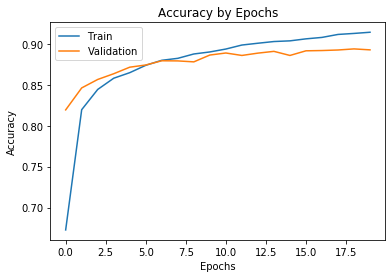

In [100]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

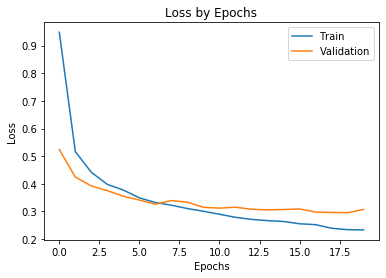

In [101]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [102]:
model.save_weights('model_weights.h5')
model.save('model.h5')

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model_loaded = load_model('model.h5')

In [107]:
model_loaded